## Open Tractor Test Notebook
This notebook contains the code and functions we need to test out out orientation identification and mapping methods.

### Making some relevant imports

In [4]:
%matplotlib inline
#%matplotlib qt # Choose %matplotlib qt to plot to an interactive window
import cv2 # OpenCV for Image processisng & perspective transform
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import scipy.misc # For saving images as needed
import glob  # For reading in a list of images from a folder

### Image selection for marker testing

In [5]:
# Random Selector: grabs a random image and display it

path = './OSE_Tractor_Photos/*'
img_list = glob.glob(path)
idx = np.random.randint(0, len(img_list)-1)
core_img = mpimg.imread(img_list[idx])


## Use the below block in case you want to overwrite the random selection by a specific image

#core_img = mpimg.imread('./OSE_Tractor_Photos/IMG_20170905_183523.jpg')
#plt.imshow(rock_img)

### Getting the HSV values of a color from its RGB values

In [ ]:
'''
# SECTION: Getting the HSV values of White
# white: rgb(255,255,255)
white = np.uint8([[[255, 255, 255]]])
# convert the RGB White to HSV White
hsv_white = cv2.cvtColor(white,cv2.COLOR_BGR2HSV)
# print out the values of the HSV Gold
print(hsv_white)
'''

### Looping over all pictures applying smoothening, RGB, & HSV filters

/Users/SEBMachine/miniconda3/envs/RoboND/lib/python3.5/site-packages/matplotlib/pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


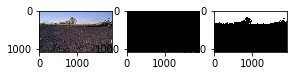

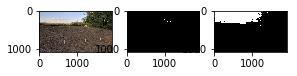

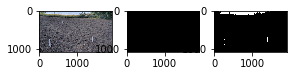

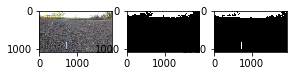

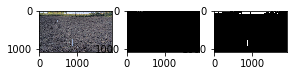

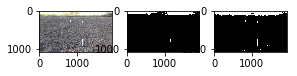

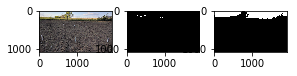

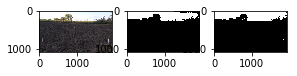

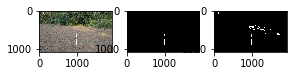

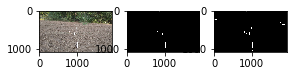

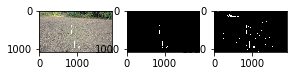

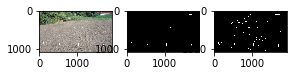

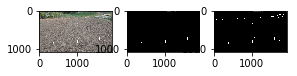

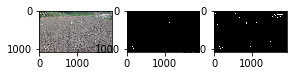

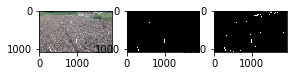

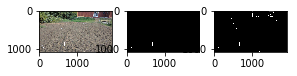

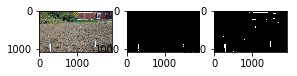

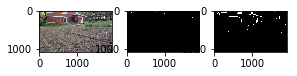

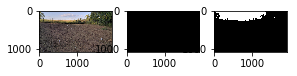

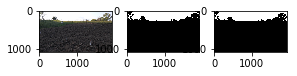

In [9]:
for i in range(0, len(img_list)):
    img = mpimg.imread(img_list[i])
    
    ## Denoising of the the image
    kernel = np.ones((5,5),np.float32)/25
    res_img = cv2.filter2D(img,-1,kernel)

    ## RGB Part
    # upperbound and lower bound of white in RGB
    # TODO: Better ranges for RGB white
    rgb_lb = np.array([230,230,230])
    rgb_ub = np.array([255,255,255])

    #Output Image with RGB Filter
    extracted = cv2.inRange(res_img, rgb_lb, rgb_ub)

    # HSV Part
    # convert the picture from RGB to HSV
    hsv_img = cv2.cvtColor(res_img, cv2.COLOR_BGR2HSV)

    # define range of white color in HSV [[[ 0 0 255]]]
    # The following works perfectly for colors, but for a reason or another it is not working for white
    # Use [H-10, 100,100] and [H+10, 255, 255] as lower bound and upper bound respectively to catch the full spectrum of a color
    # TODO: Better ranges for HSV white
    
    hsv_lb = np.array([0,0,200])
    hsv_ub = np.array([255,255,255])

    # Threshold the HSV image to get only white colors
    mask = cv2.inRange(hsv_img, hsv_lb, hsv_ub)

    # Bitwise-AND mask and original image to show the filtered parts in original colors
    #res = cv2.bitwise_and(img,img, mask= mask)
    
    plt.subplot(141)
    plt.imshow(res_img)
    plt.subplot(142)
    plt.imshow(extracted, cmap='gray')
    plt.subplot(143)
    plt.imshow(mask, cmap='gray')
    plt.figure(i+1)



# setting numpy print options to none for displaying the full array (debugging reasons)
#np.set_printoptions(threshold=np.nan)
#mask = mask>0
#%store mask >> testfile.txt